In [1]:
import pandas as pd
import numpy as np
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,classification_report



In [2]:
data = {
    "Rating" : [1,2,3,4,5,6,7,8,9,10],
    "Discount" : [10 ,15,20,25,30,35,40,45,50,75],
    "Sales" : [100,200,300,400,500,600,700,800,900,950]
}
df =pd.DataFrame(data)


In [3]:
x = df[['Rating','Discount']]
y = df['Sales']

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=100,test_size=0.20,shuffle=True)
y_test = y_test.astype(np.int64)

In [5]:
x_train

Rating  Discount
1       2        15
5       6        35
4       5        30
2       3        20
0       1        10
3       4        25
9      10        75
8       9        50

In [6]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [7]:
y_pred = reg.predict(x_test).round().astype(np.int64)
# classification_report(y_test,y_pred)

In [8]:
accuracy = accuracy_score(y_test,y_pred)
creport =classification_report(y_test,y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))
# print(accuracy_score(y_test,y_pred)*100)
# print(classification_report(y_test,y_pred))
print(creport)

Accuracy: 100.00%
              precision    recall  f1-score   support

         700       1.00      1.00      1.00         1
         800       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [9]:
import matplotlib.pyplot as plt,seaborn as sns


C:\Users\10725880\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


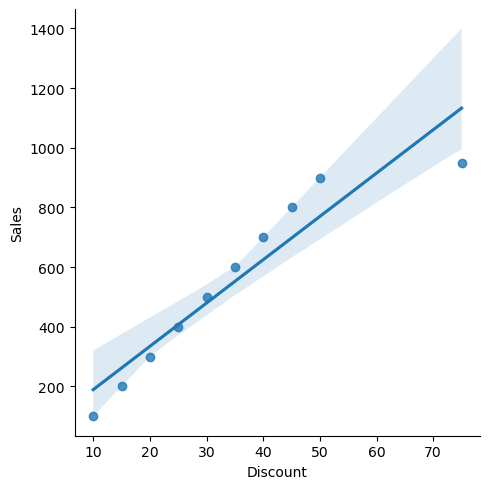

In [10]:
sns.lmplot(x = "Discount",y="Sales",data=df)

In [11]:
reg.intercept_

12.500000000000114

In [12]:
reg.coef_

array([112.5,  -2.5])

In [13]:
import joblib
# 


joblib.dump(reg,"model.joblib")

['model.joblib']

In [14]:
reg_new  =joblib.load("model.joblib")

reg_new.predict(x_test)


array([800., 700.])